In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [20]:
# Reading the training data set
data = pd.read_csv('Google_train_data.csv')

In [21]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
# Dropping N/A values to stop errors
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [23]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [24]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [26]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 4s - 115ms/step - loss: 0.0315
Epoch 2/20
35/35 - 3s - 74ms/step - loss: 0.0113
Epoch 3/20
35/35 - 3s - 74ms/step - loss: 0.0097
Epoch 4/20
35/35 - 3s - 76ms/step - loss: 0.0217
Epoch 5/20
35/35 - 3s - 76ms/step - loss: 0.0080
Epoch 6/20
35/35 - 3s - 77ms/step - loss: 0.0078
Epoch 7/20
35/35 - 3s - 76ms/step - loss: 0.0065
Epoch 8/20
35/35 - 3s - 78ms/step - loss: 0.0069
Epoch 9/20
35/35 - 3s - 77ms/step - loss: 0.0062
Epoch 10/20
35/35 - 3s - 77ms/step - loss: 0.0058
Epoch 11/20
35/35 - 3s - 76ms/step - loss: 0.0061
Epoch 12/20
35/35 - 3s - 78ms/step - loss: 0.0056
Epoch 13/20
35/35 - 3s - 83ms/step - loss: 0.0054
Epoch 14/20
35/35 - 3s - 77ms/step - loss: 0.0052
Epoch 15/20
35/35 - 3s - 79ms/step - loss: 0.0054
Epoch 16/20
35/35 - 3s - 78ms/step - loss: 0.0052
Epoch 17/20
35/35 - 3s - 79ms/step - loss: 0.0057
Epoch 18/20
35/35 - 3s - 85ms/step - loss: 0.0046
Epoch 19/20
35/35 - 3s - 84ms/step - loss: 0.0054
Epoch 20/20
35/35 - 3s - 79ms/step - loss: 0.0051


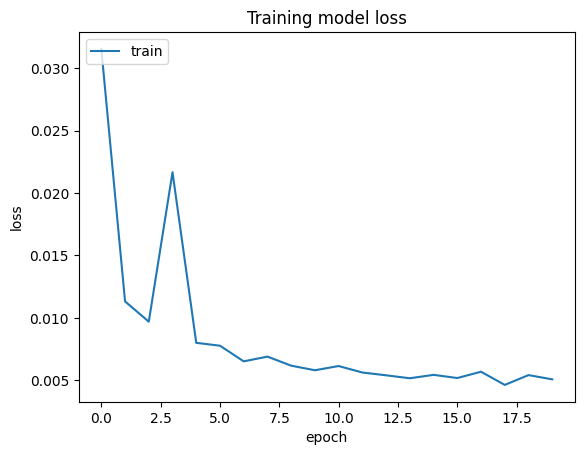

In [28]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [29]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [30]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.1727215],
       [1.1758982],
       [1.1855559],
       [1.2006912],
       [1.2150227],
       [1.2197198],
       [1.2125409],
       [1.1979865],
       [1.185076 ],
       [1.1780494],
       [1.1704515],
       [1.1603552],
       [1.1506311],
       [1.1414424],
       [1.1374439],
       [1.1393682],
       [1.1526173],
       [1.1763955],
       [1.2063526],
       [1.2382296],
       [1.2573367],
       [1.2615479],
       [1.2487893],
       [1.2242657],
       [1.197594 ],
       [1.1777302],
       [1.1679401],
       [1.1640688],
       [1.1582979],
       [1.1500622],
       [1.1401948],
       [1.1283904],
       [1.111162 ],
       [1.0890689],
       [1.0757095],
       [1.0778981],
       [1.0932741],
       [1.115281 ],
       [1.1389462],
       [1.1550838],
       [1.1691386],
       [1.1836239],
       [1.1994693],
       [1.2147995],
       [1.2264974],
       [1.2306644],
       [1.2249275],
       [1.2168092],
       [1.2120062],
       [1.2138244],


In [31]:
predicted_price = sc.inverse_transform(y_pred)

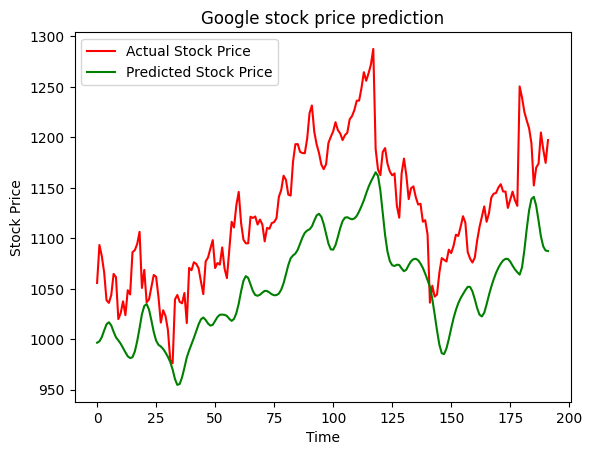

In [32]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()